In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical

import mnist

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
# import train and test data
(X_train, y_train), (X_dev, y_dev) = mnist.load_data()

In [3]:
parameters = dict(
    batch_size=128,
    n_epochs=20,
)

# Model creation
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adadelta(learning_rate=0.1),
    metrics=["accuracy"]
)

In [4]:
history = model.fit(
    X_train,
    y_train,
    batch_size=parameters["batch_size"],
    epochs=parameters["n_epochs"],
    verbose=1,
    validation_data=(X_dev, y_dev),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 432us/sample - loss: 0.5799 - accuracy: 0.8555 - val_loss: 0.2800 - val_accuracy: 0.9197
Epoch 2/20
60000/60000 [==============================] - 27s 457us/sample - loss: 0.2658 - accuracy: 0.9232 - val_loss: 0.2407 - val_accuracy: 0.9301
Epoch 3/20
60000/60000 [==============================] - 33s 549us/sample - loss: 0.2156 - accuracy: 0.9380 - val_loss: 0.1888 - val_accuracy: 0.9466
Epoch 4/20
60000/60000 [==============================] - 36s 594us/sample - loss: 0.1790 - accuracy: 0.9479 - val_loss: 0.1607 - val_accuracy: 0.9548
Epoch 5/20
60000/60000 [==============================] - 51s 853us/sample - loss: 0.1519 - accuracy: 0.9559 - val_loss: 0.1344 - val_accuracy: 0.9617
Epoch 6/20
60000/60000 [==============================] - 46s 760us/sample - loss: 0.1312 - accuracy: 0.9618 - val_loss: 0.1225 - val_accuracy: 0.9656
Epoch 7/20
60000/60000 [====================

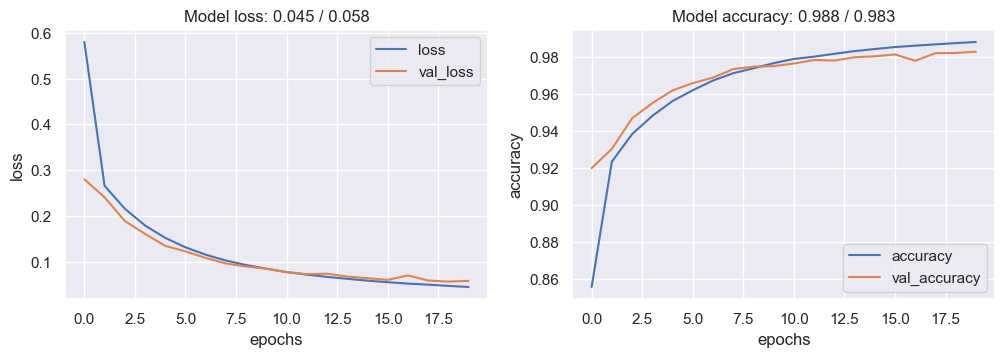

In [13]:
mnist.plot_history(history)

In [12]:
X_test, y_test = mnist.load_handwritten("handwritten.pkl")

score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss of own handwritten digits: {score[0]:.3f}")
print(f"Test accuracy: {score[1]:.3f}")

Test loss of own handwritten digits: 0.579
Test accuracy: 0.860


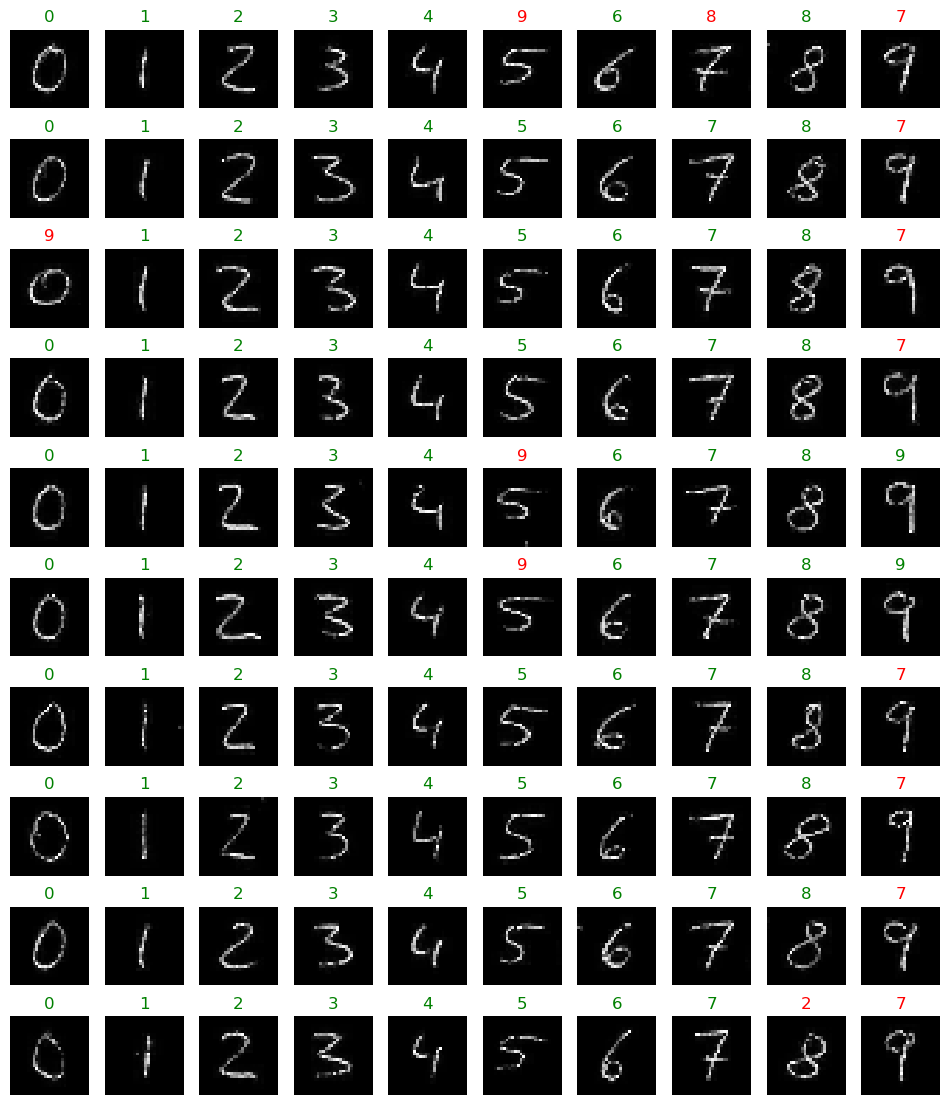

In [7]:
sns.reset_defaults()
y_pred = model.predict_classes(X_test.reshape(-1, 28, 28, 1))

fig = plt.figure(figsize=(12, 14))

for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    correct = y_pred[i] == np.argmax(y_test[i])
    plt.title(y_pred[i], color="green" if correct else "red");